In [22]:
import joblib
import os
from collections import defaultdict

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, RocCurveDisplay,
    accuracy_score, precision_score, recall_score,
    roc_auc_score
)

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
test_data = joblib.load('processed/test/data.joblib')
y_true = test_data[:, :6]

y_pred = joblib.load('processed/y_pred.joblib')
y_pred_class = y_pred.round()

y_true.shape, y_pred.shape

((22355, 6), (22355, 6))

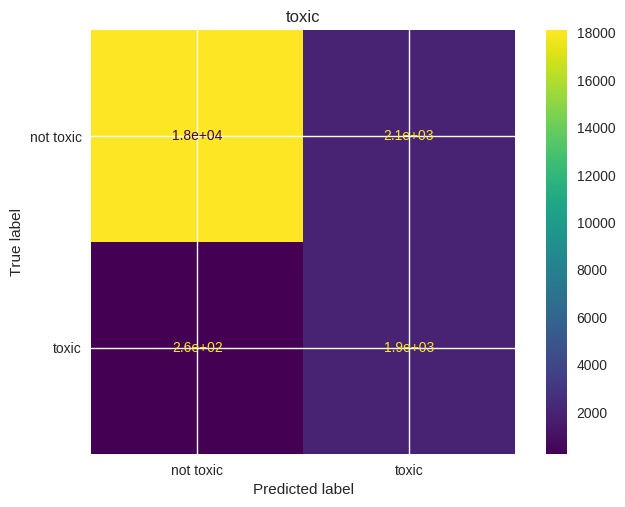

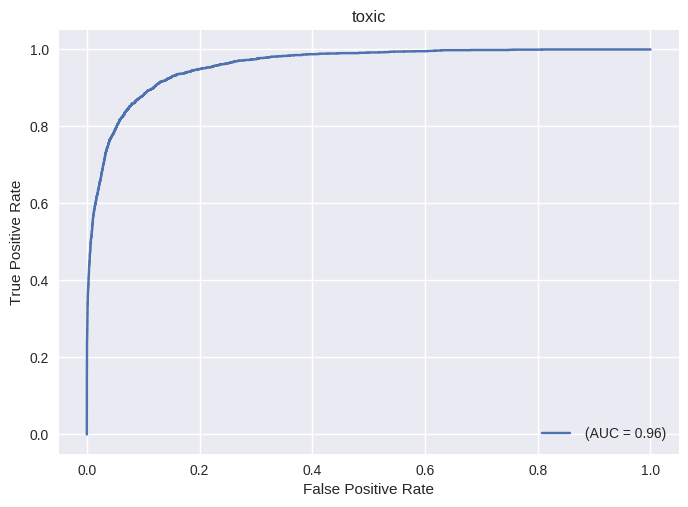

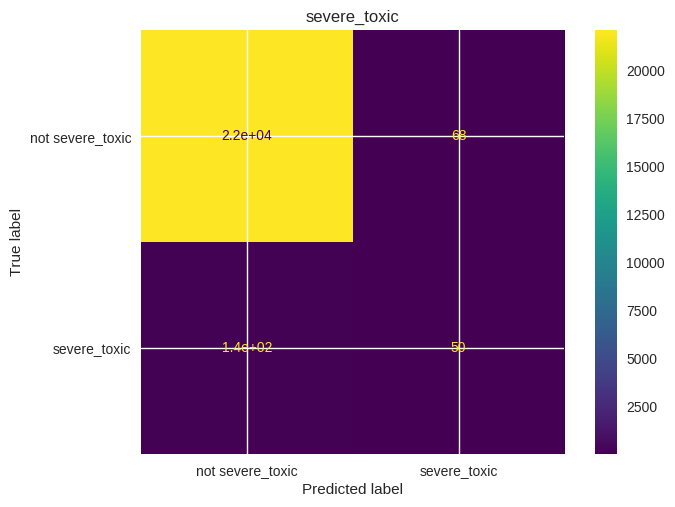

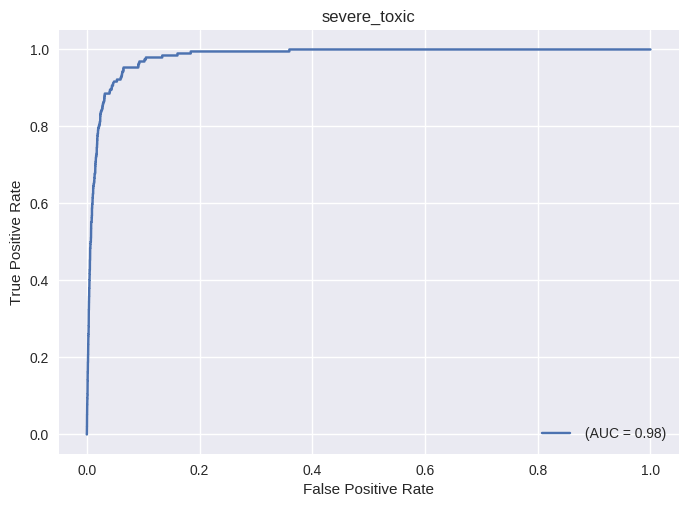

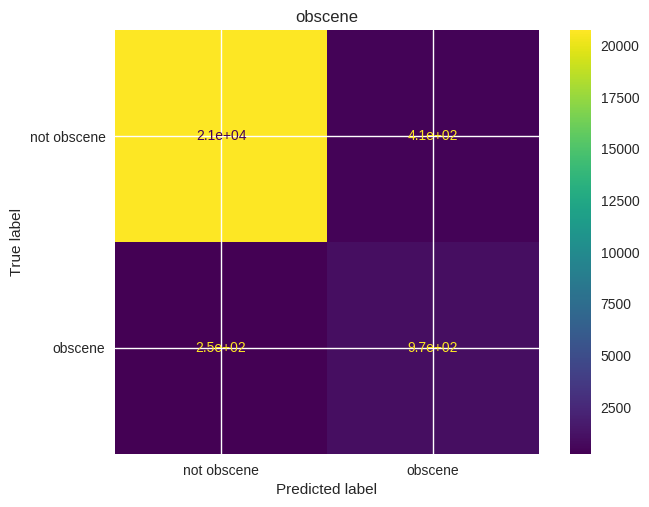

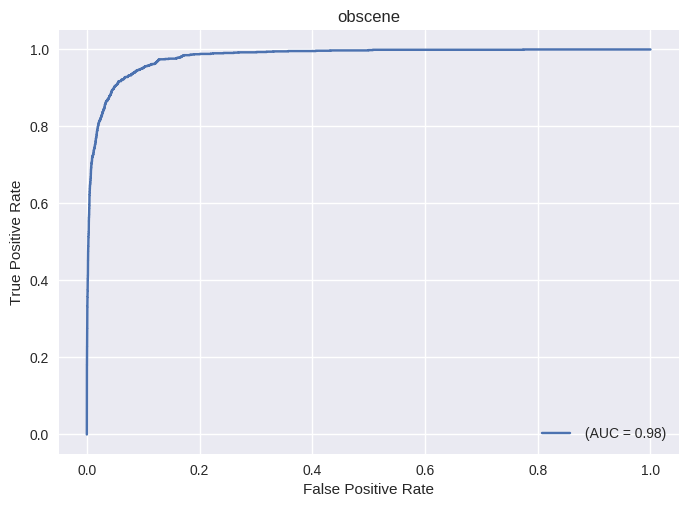

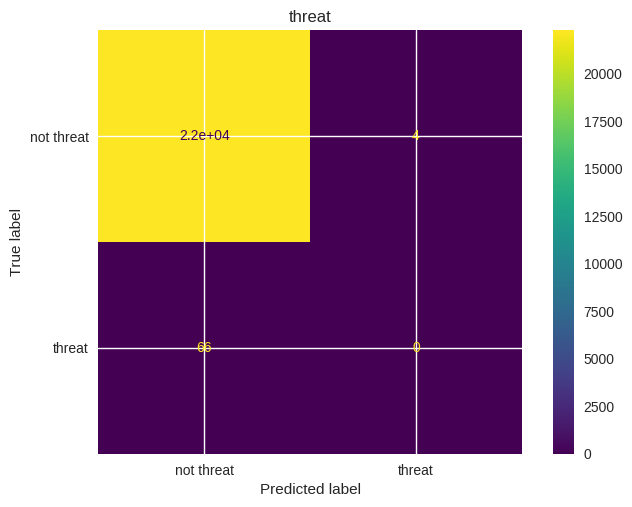

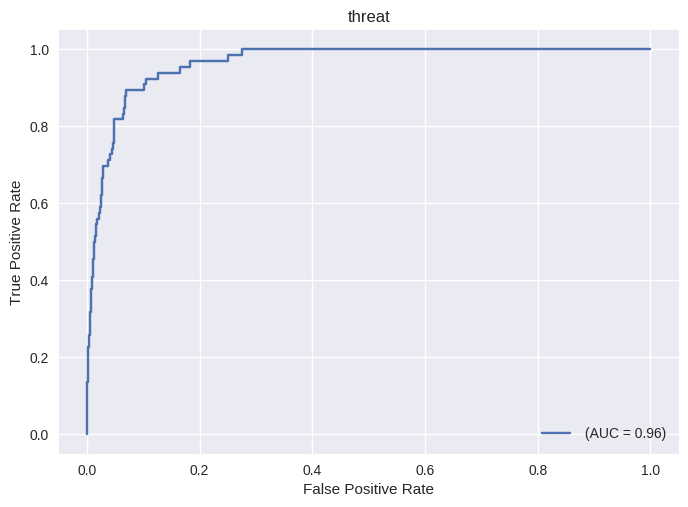

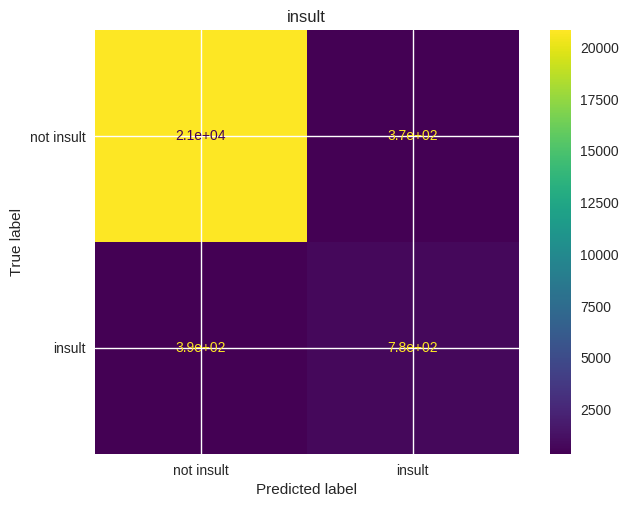

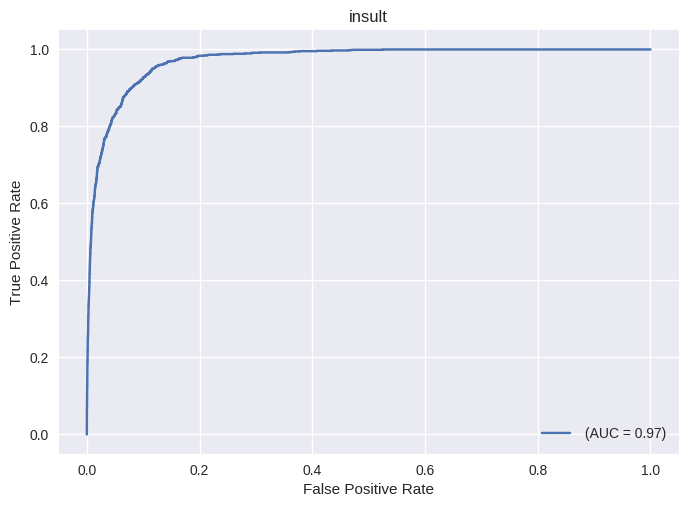

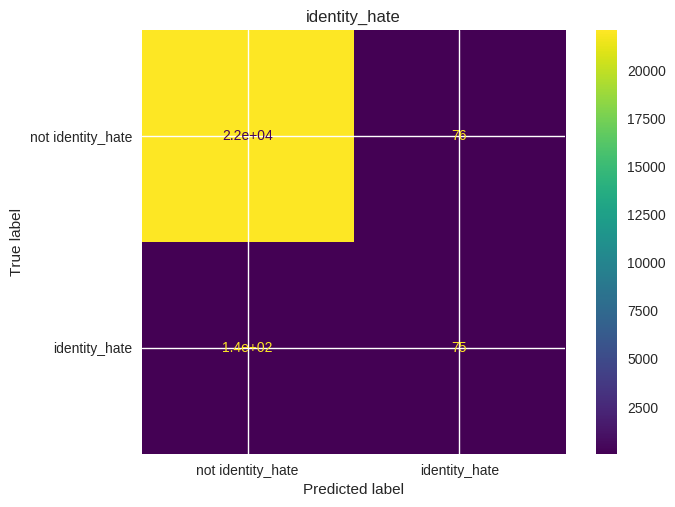

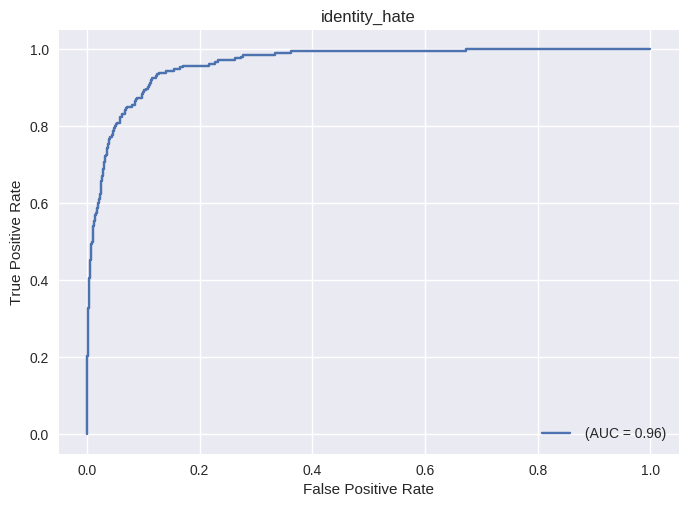

In [17]:
# save plots
asset_dir = 'results/final/'
os.makedirs(asset_dir, exist_ok=True)

display_labels = ['toxic', 'severe_toxic', 'obscene', 'threat',
                  'insult', 'identity_hate']

roc_auc_results = []
for i in range(6):
    filename = os.path.join(asset_dir, f'confusion_matrix_{i}.png')
    labels = [f'not {display_labels[i]}', f'{display_labels[i]}']
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true[:, i], y_pred_class[:, i]), labels).plot()
    disp.ax_.set_title(display_labels[i])
    disp.figure_.savefig(filename)
    
    filename = os.path.join(asset_dir, f'roc_curve_{i}.png')
    fpr, tpr, thresholds = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_results.append(roc_auc)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='').plot()
    disp.ax_.set_title(display_labels[i])
    disp.figure_.savefig(filename)

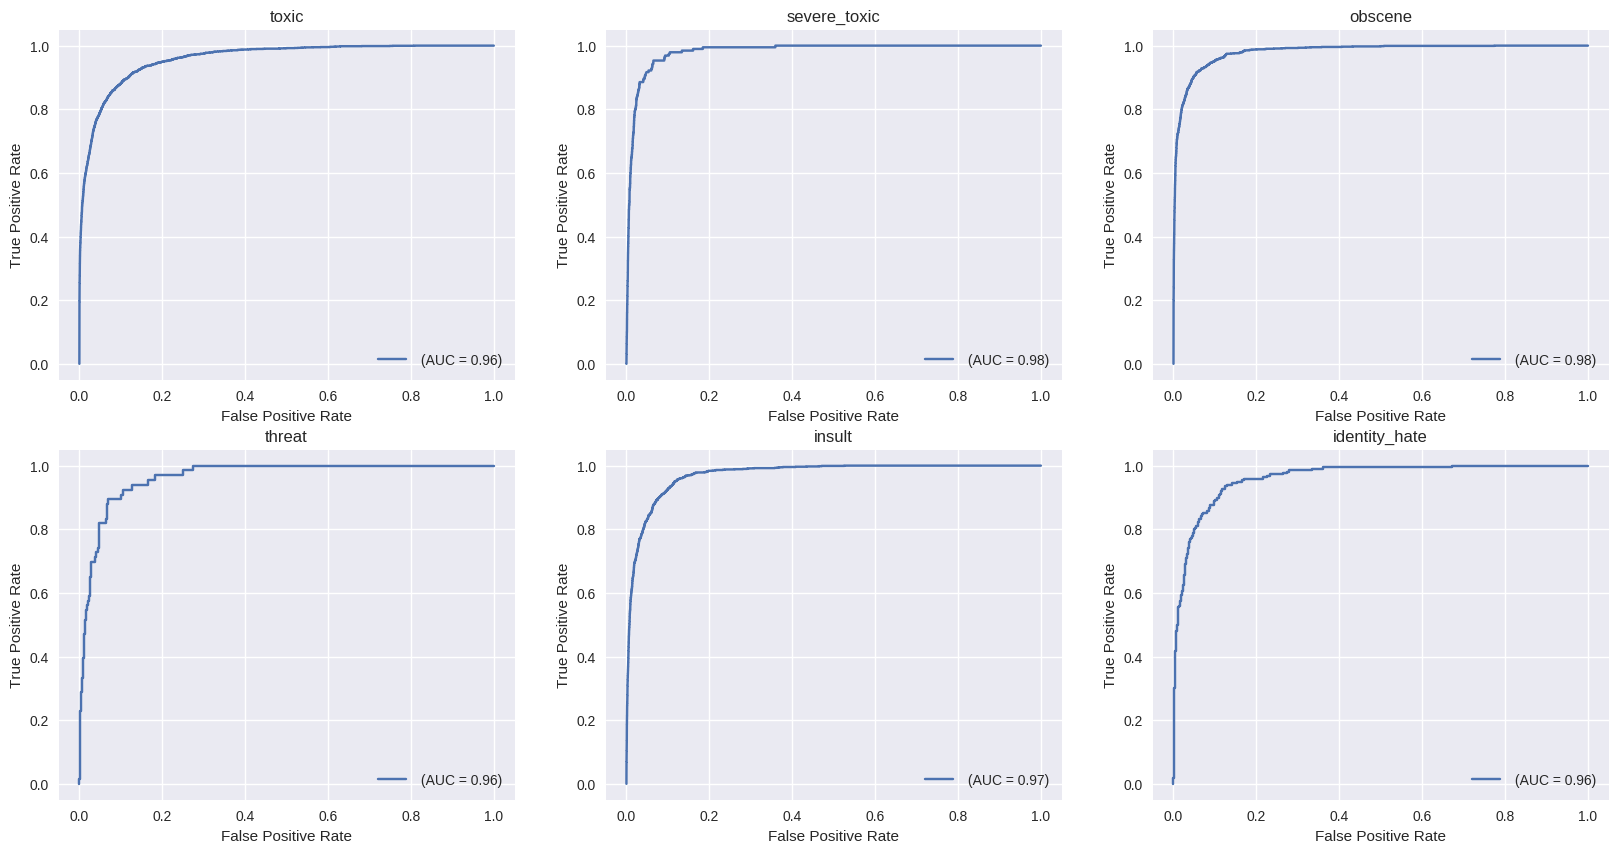

In [49]:
# save combined confusion matrix plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

roc_auc_results = []
for i in range(6):
    ax = axes[i//3][i%3]
    labels = [f'not {display_labels[i]}', f'{display_labels[i]}']
    fpr, tpr, thresholds = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_results.append(roc_auc)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='').plot(ax=ax)    
    ax.set_title(display_labels[i])
    
fig.savefig('results/roc_curve.png')

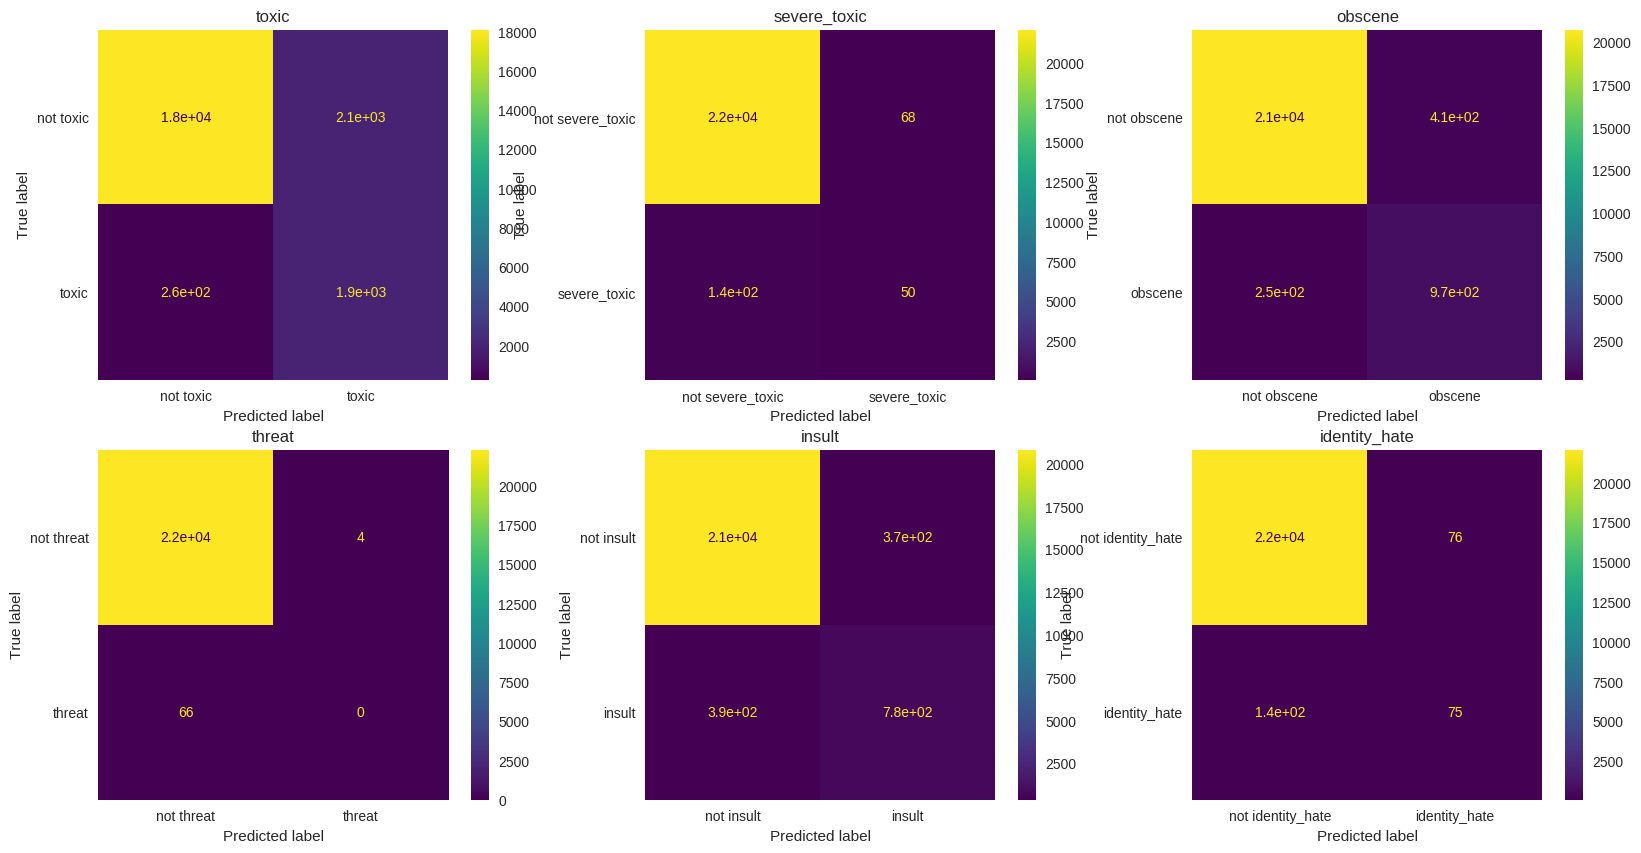

In [50]:
# save combined confusion matrix plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

roc_auc_results = []
for i in range(6):
    ax = axes[i//3][i%3]
    labels = [f'not {display_labels[i]}', f'{display_labels[i]}']
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true[:, i], y_pred_class[:, i]), labels).plot(
        ax=ax
    )
    ax.set_title(display_labels[i])
    ax.grid(False)
    
fig.savefig('results/confusion_matrix.png')

In [51]:
# print metrics
metrics = defaultdict(list)
for label in range(6):
    y_pred_i = y_pred[:, label]
    y_pred_class_i = y_pred_class[:, label]
    y_true_i = y_true[:, label]

    metrics['accuracy'].append(accuracy_score(y_true_i, y_pred_class_i))
    metrics['precision'].append(precision_score(y_true_i, y_pred_class_i))
    metrics['recall'].append(recall_score(y_true_i, y_pred_class_i))
    metrics['roc_auc'].append(roc_auc_score(y_true_i, y_pred_i))

avg_metrics = {}
for name, results in metrics.items():
    print(f'{name} at class level: {results}')
    avg_metrics[name] = sum(results) / len(results)


results = [f'{name}: {result};' for name, result in avg_metrics.items()]
print(' '.join(results))

accuracy at class level: [0.8963542831581301, 0.9906061283829121, 0.9706106016551107, 0.9968687094609707, 0.9661373294564974, 0.9902929993290092]
precision at class level: [0.4852720918622067, 0.423728813559322, 0.7023895727733527, 0.0, 0.6771105308964317, 0.4966887417218543]
recall at class level: [0.8840381991814461, 0.2604166666666667, 0.7976973684210527, 0.0, 0.6683848797250859, 0.3472222222222222]
roc_auc at class level: [0.9594409287412661, 0.9819111290965423, 0.9812064948859803, 0.9641588390522842, 0.9721829041084515, 0.9623504608090633]
accuracy: 0.968478341907105; precision: 0.4641982918021946; recall: 0.49295988936941226; roc_auc: 0.9702084594489313;
